### Testando os modelos UNET

Principalmente verificando os shapes dos inputs e outputs, e o uso de memória da GPU

In [1]:
# imports

import os
import sys
sys.path.append(os.path.abspath('..'))

import src.models.unets as unets
#import src.models.unets as unets

import torch
from torchinfo import summary


In [2]:
def print_gpu_memory(prefix=""):
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / (1024 ** 2)
        reserved = torch.cuda.memory_reserved() / (1024 ** 2)
        print(f"{prefix} Memory Allocated: {allocated:.2f} MB")
        print(f"{prefix} Memory Reserved: {reserved:.2f} MB")
    else:
        print("CUDA is not available.")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache() 

print_gpu_memory()


 Memory Allocated: 0.00 MB
 Memory Reserved: 0.00 MB


In [3]:
torch.cuda.empty_cache() 


In [4]:
batch_size = 1
num_classes = 9
img_size = 64

model = unets.UNetSmall(12, out_channels=num_classes).to(device)  # 12 channels, 9 classes
input_tensor = torch.rand(batch_size, 12, img_size, img_size).to(device)  # batch = 6
output = model(input_tensor)
print('-------------------------------------------')
print('UNet shapes:')
print('Input:', input_tensor.shape)
print('Output:', output.shape)
print_gpu_memory()

print('-------- SUMMARY ----------')
print(summary(model, input_size=(batch_size, 12, img_size, img_size), depth=1))
torch.cuda.empty_cache() 



-------------------------------------------
UNet shapes:
Input: torch.Size([1, 12, 64, 64])
Output: torch.Size([1, 9, 64, 64])
 Memory Allocated: 17.71 MB
 Memory Reserved: 34.00 MB
-------- SUMMARY ----------
Layer (type:depth-idx)                   Output Shape              Param #
UNetSmall                                [1, 9, 64, 64]            --
├─ConvBlock: 1-1                         [1, 32, 64, 64]           12,864
├─MaxPool2d: 1-2                         [1, 32, 32, 32]           --
├─ConvBlock: 1-3                         [1, 64, 32, 32]           55,680
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─ConvBlock: 1-5                         [1, 128, 16, 16]          221,952
├─MaxPool2d: 1-6                         [1, 128, 8, 8]            --
├─ConvBlock: 1-7                         [1, 256, 8, 8]            886,272
├─ConvTranspose2d: 1-8                   [1, 128, 16, 16]          131,200
├─ConvBlock: 1-9                         [1, 128, 16, 16]     

In [5]:
batch_size = 1
num_classes = 9
img_size = 64

model = unets.UNetSmall(12, out_channels=num_classes, use_dist=True).to(device)  # 12 channels, 9 classes
input_tensor = torch.rand(batch_size, 12, img_size, img_size).to(device)  # batch = 6
output = model(input_tensor)
print('-------------------------------------------')
print('UNet shapes:')
print('Input:', input_tensor.shape)
print('Output:', output.shape)
print_gpu_memory()

print('-------- SUMMARY ----------')
print(summary(model, input_size=(batch_size, 12, img_size, img_size), depth=1))
torch.cuda.empty_cache() 


-------------------------------------------
UNet shapes:
Input: torch.Size([1, 12, 64, 64])
Output: torch.Size([1, 9, 64, 64])
 Memory Allocated: 34.08 MB
 Memory Reserved: 48.00 MB
-------- SUMMARY ----------
Layer (type:depth-idx)                   Output Shape              Param #
UNetSmall                                [1, 9, 64, 64]            --
├─ConvBlock: 1-1                         [1, 32, 64, 64]           12,864
├─MaxPool2d: 1-2                         [1, 32, 32, 32]           --
├─ConvBlock: 1-3                         [1, 64, 32, 32]           55,680
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─ConvBlock: 1-5                         [1, 128, 16, 16]          221,952
├─MaxPool2d: 1-6                         [1, 128, 8, 8]            --
├─ConvBlock: 1-7                         [1, 256, 8, 8]            886,272
├─ConvTranspose2d: 1-8                   [1, 128, 16, 16]          131,200
├─ConvBlock: 1-9                         [1, 128, 16, 16]     

In [6]:
batch_size = 1
num_classes = 9
img_size = 256

model = unets.UNet(12, out_channels=num_classes).to(device)  # 12 channels, 9 classes
input_tensor = torch.rand(batch_size, 12, img_size, img_size).to(device)  # batch = 6
output = model(input_tensor)
print('-------------------------------------------')
print('UNet shapes:')
print('Input:', input_tensor.shape)
print('Output:', output.shape)
print_gpu_memory()

print('-------- SUMMARY ----------')
print(summary(model, input_size=(batch_size, 12, img_size, img_size), depth=1))
torch.cuda.empty_cache() 


-------------------------------------------
UNet shapes:
Input: torch.Size([1, 12, 256, 256])
Output: torch.Size([1, 9, 256, 256])
 Memory Allocated: 481.46 MB
 Memory Reserved: 512.00 MB
-------- SUMMARY ----------
Layer (type:depth-idx)                   Output Shape              Param #
UNet                                     [1, 9, 256, 256]          3
├─ConvBlock: 1-1                         [1, 64, 256, 256]         44,160
├─MaxPool2d: 1-2                         [1, 64, 128, 128]         --
├─ConvBlock: 1-3                         [1, 128, 128, 128]        221,952
├─MaxPool2d: 1-4                         [1, 128, 64, 64]          --
├─ConvBlock: 1-5                         [1, 256, 64, 64]          886,272
├─MaxPool2d: 1-6                         [1, 256, 32, 32]          --
├─ConvBlock: 1-7                         [1, 512, 32, 32]          3,542,016
├─MaxPool2d: 1-8                         [1, 512, 16, 16]          --
├─ConvBlock: 1-9                         [1, 1024, 16, 16] 

In [7]:

if 0:
    model = unets.MultiUNet(12, out_channels=[2, 5, 4]).to(device)  # 12 channels, 5 classes
    #model = unets.UNetSmall(12, out_channels=5).to(device)  # 12 channels, 5 classes
    input_tensor = torch.rand(6, 12, 64, 64).to(device)  # batch = 6
    output = model(input_tensor)
    print('-------------------------------------------')
    print('UNet shapes:')
    print('Input:', input_tensor.shape)
    print('Output:', output.shape)
    print_gpu_memory()

    print('-------- SUMMARY ----------')
    print(summary(model, input_size=(6, 12, 64, 64), depth=1))
    torch.cuda.empty_cache() 

In [8]:
batch_size = 1
num_classes = 9

model = unets.UNetResNet34(12, out_channels=num_classes).to(device)  # 12 channels, 5 classes
input_tensor = torch.rand(batch_size, 12, 224, 224).to(device)  # batch = 6
output = model(input_tensor)
print('-------------------------------------------')
print('UNet shapes:')
print('Input:', input_tensor.shape)
print('Output:', output.shape)
print_gpu_memory()

print('-------- SUMMARY ----------')
print(summary(model, input_size=(batch_size, 12, 224, 224), depth=2))
torch.cuda.empty_cache() 



-------------------------------------------
UNet shapes:
Input: torch.Size([1, 12, 224, 224])
Output: torch.Size([1, 9, 224, 224])
 Memory Allocated: 379.83 MB
 Memory Reserved: 752.00 MB
-------- SUMMARY ----------
Layer (type:depth-idx)                   Output Shape              Param #
UNetResNet34                             [1, 9, 224, 224]          2,808,555
├─Sequential: 1-1                        [1, 64, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 64, 112, 112]         37,632
│    └─BatchNorm2d: 2-2                  [1, 64, 112, 112]         128
│    └─ReLU: 2-3                         [1, 64, 112, 112]         --
├─MaxPool2d: 1-2                         [1, 64, 56, 56]           --
├─Sequential: 1-3                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-4                   [1, 64, 56, 56]           73,984
│    └─BasicBlock: 2-5                   [1, 64, 56, 56]           73,984
│    └─BasicBlock: 2-6                   [1, 64, 56, 56]   

In [9]:
batch_size = 1
num_classes = 9

model = unets.UNetEfficientNetB0(12, out_channels=num_classes).to(device)
input_tensor = torch.rand(batch_size, 12, 224, 224).to(device)  # batch = 6
output = model(input_tensor)
print('-------------------------------------------')
print('UNetEfficientNetB0 shapes:')
print('Input:', input_tensor.shape)
print('Output:', output.shape)
print_gpu_memory()
torch.cuda.empty_cache() 

print('-------- SUMMARY ----------')
print(summary(model, input_size=(batch_size, 12, 224, 224), depth=3))
torch.cuda.empty_cache() 

#print(model.efficientnet.features)


-------------------------------------------
UNetEfficientNetB0 shapes:
Input: torch.Size([1, 12, 224, 224])
Output: torch.Size([1, 9, 224, 224])
 Memory Allocated: 384.93 MB
 Memory Reserved: 574.00 MB
-------- SUMMARY ----------
Layer (type:depth-idx)                                       Output Shape              Param #
UNetEfficientNetB0                                           [1, 9, 224, 224]          3
├─EfficientNet: 1-1                                          --                        1,281,000
│    └─Sequential: 2-1                                       --                        3,155,740
│    │    └─Conv2dNormActivation: 3-1                        [1, 32, 112, 112]         3,520
│    │    └─Sequential: 3-2                                  [1, 16, 112, 112]         1,448
│    │    └─Sequential: 3-3                                  [1, 24, 56, 56]           16,714
│    │    └─Sequential: 3-4                                  [1, 40, 28, 28]           46,640
│    │    └─Sequen

In [10]:
batch_size = 1
num_classes = 9

model = unets.UNetConvNext(12, out_channels=num_classes).to(device)
input_tensor = torch.rand(batch_size, 12, 224, 224).to(device)  # batch = 6
output = model(input_tensor)
print('-------------------------------------------')
print('UNetConvNext shapes:')
print('Input:', input_tensor.shape)
print('Output:', output.shape)
print_gpu_memory()
torch.cuda.empty_cache() 
print('-------- SUMMARY ----------')
print(summary(model, input_size=(batch_size, 12, 224, 224), depth=3))
torch.cuda.empty_cache() 



-------------------------------------------
UNetConvNext shapes:
Input: torch.Size([1, 12, 224, 224])
Output: torch.Size([1, 9, 224, 224])
 Memory Allocated: 613.22 MB
 Memory Reserved: 774.00 MB
-------- SUMMARY ----------
Layer (type:depth-idx)                   Output Shape              Param #
UNetConvNext                             [1, 9, 224, 224]          27,058,411
├─Conv2dNormActivation: 1-1              [1, 96, 56, 56]           --
│    └─Conv2d: 2-1                       [1, 96, 56, 56]           18,528
│    └─LayerNorm2d: 2-2                  [1, 96, 56, 56]           192
├─Sequential: 1-2                        [1, 96, 56, 56]           --
│    └─CNBlock: 2-3                      [1, 96, 56, 56]           96
│    │    └─Sequential: 3-1              [1, 96, 56, 56]           79,200
│    │    └─StochasticDepth: 3-2         [1, 96, 56, 56]           --
│    └─CNBlock: 2-4                      [1, 96, 56, 56]           96
│    │    └─Sequential: 3-3              [1, 96, 56, 5

## Testando modelos HRNet

In [11]:
import src.models.hrnets as hrnets

batch_size = 8
num_classes = 9
img_size = 512

model = hrnets.HRNetSegmentation(in_channels= 12, num_classes=num_classes, backbone="hrnet_w18_small", pretrained=True).to(device)  # 12 channels, 5 classes
input_tensor = torch.rand(batch_size, 12, img_size, img_size).to(device)  # batch = 6
output = model(input_tensor)
print('-------------------------------------------')
print('UNetConvNext shapes:')
print('Input:', input_tensor.shape)
print('Output:', output.shape)
print_gpu_memory()
torch.cuda.empty_cache() 
print('-------- SUMMARY ----------')
print(summary(model, input_size=(batch_size, 12, img_size, img_size), depth=5))
torch.cuda.empty_cache() 



-------------------------------------------
UNetConvNext shapes:
Input: torch.Size([8, 12, 512, 512])
Output: torch.Size([8, 9, 512, 512])
 Memory Allocated: 1348.76 MB
 Memory Reserved: 3428.00 MB
-------- SUMMARY ----------
Layer (type:depth-idx)                                       Output Shape              Param #
HRNetSegmentation                                            [8, 9, 512, 512]          --
├─HighResolutionNetFeatures: 1-1                             [8, 64, 256, 256]         --
│    └─Conv2d: 2-1                                           [8, 64, 256, 256]         6,912
│    └─BatchNorm2d: 2-2                                      [8, 64, 256, 256]         128
│    └─ReLU: 2-3                                             [8, 64, 256, 256]         --
│    └─Conv2d: 2-4                                           [8, 64, 128, 128]         36,864
│    └─BatchNorm2d: 2-5                                      [8, 64, 128, 128]         128
│    └─ReLU: 2-6                        


SMALL:

Total params: 20,262,511
Trainable params: 20,262,511
Non-trainable params: 0
Total mult-adds (G): 58.63
==============================================================================================================
Input size (MB): 12.58
Forward/backward pass size (MB): 773.52
Params size (MB): 81.05
Estimated Total Size (MB): 867.15
======================================

NORMAL:
Total params: 28,374,051
Trainable params: 28,374,051
Non-trainable params: 0
Total mult-adds (G): 72.65
==============================================================================================================
Input size (MB): 12.58
Forward/backward pass size (MB): 1658.76
Params size (MB): 113.50
Estimated Total Size (MB): 1784.84

SMALL V2:

Total params: 22,672,511
Trainable params: 22,672,511
Non-trainable params: 0
Total mult-adds (G): 63.83
==============================================================================================================
Input size (MB): 12.58
Forward/backward pass size (MB): 1102.14
Params size (MB): 90.69
Estimated Total Size (MB): 1205.41

In [12]:

batch_size = 4
num_classes = 9
img_size = 512

model = hrnets.HRNetSegmentation(in_channels= 12, num_classes=num_classes, backbone="hrnet_w32", pretrained=True, debug=True).to(device)  # 12 channels, 5 classes
input_tensor = torch.rand(batch_size, 12, img_size, img_size).to(device)  # batch = 6
output = model(input_tensor)
print('-------------------------------------------')
print('UNetConvNext shapes:')
print('Input:', input_tensor.shape)
print('Output:', output.shape)
print_gpu_memory()
torch.cuda.empty_cache() 
print('-------- SUMMARY ----------')
print(summary(model, input_size=(batch_size, 12, img_size, img_size), depth=5))
torch.cuda.empty_cache() 

-------------------------------------------
UNetConvNext shapes:
Input: torch.Size([4, 12, 512, 512])
Output: torch.Size([4, 9, 512, 512])
 Memory Allocated: 1001.04 MB
 Memory Reserved: 5440.00 MB
-------- SUMMARY ----------
Layer (type:depth-idx)                                       Output Shape              Param #
HRNetSegmentation                                            [4, 9, 512, 512]          --
├─HighResolutionNetFeatures: 1-1                             [4, 64, 256, 256]         --
│    └─Conv2d: 2-1                                           [4, 64, 256, 256]         6,912
│    └─BatchNorm2d: 2-2                                      [4, 64, 256, 256]         128
│    └─ReLU: 2-3                                             [4, 64, 256, 256]         --
│    └─Conv2d: 2-4                                           [4, 64, 128, 128]         36,864
│    └─BatchNorm2d: 2-5                                      [4, 64, 128, 128]         128
│    └─ReLU: 2-6                        

In [13]:
batch_size = 2
num_classes = 9
img_size = 512

model = hrnets.HRNetSegmentation(in_channels= 12, num_classes=num_classes, backbone="hrnet_w64", pretrained=True, debug=True).to(device)  # 12 channels, 5 classes
input_tensor = torch.rand(batch_size, 12, img_size, img_size).to(device)  # batch = 6
output = model(input_tensor)
print('-------------------------------------------')
print('UNetConvNext shapes:')
print('Input:', input_tensor.shape)
print('Output:', output.shape)
print_gpu_memory()
torch.cuda.empty_cache() 
print('-------- SUMMARY ----------')
print(summary(model, input_size=(batch_size, 12, img_size, img_size), depth=5))
torch.cuda.empty_cache() 

-------------------------------------------
UNetConvNext shapes:
Input: torch.Size([2, 12, 512, 512])
Output: torch.Size([2, 9, 512, 512])
 Memory Allocated: 1210.32 MB
 Memory Reserved: 4494.00 MB
-------- SUMMARY ----------
Layer (type:depth-idx)                                       Output Shape              Param #
HRNetSegmentation                                            [2, 9, 512, 512]          --
├─HighResolutionNetFeatures: 1-1                             [2, 64, 256, 256]         --
│    └─Conv2d: 2-1                                           [2, 64, 256, 256]         6,912
│    └─BatchNorm2d: 2-2                                      [2, 64, 256, 256]         128
│    └─ReLU: 2-3                                             [2, 64, 256, 256]         --
│    └─Conv2d: 2-4                                           [2, 64, 128, 128]         36,864
│    └─BatchNorm2d: 2-5                                      [2, 64, 128, 128]         128
│    └─ReLU: 2-6                        

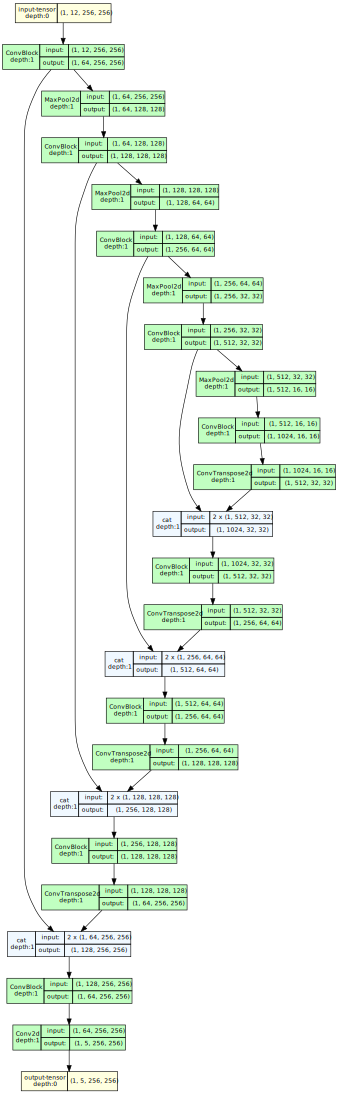

In [14]:
from torchview import draw_graph
model = unets.UNet(12, out_channels=5).to(device)  # 12 channels, 5 classes


model_graph = draw_graph(model, input_size=(1, 12, 256, 256), expand_nested=True, depth=1)
diagram = model_graph.visual_graph
diagram

In [15]:
type(model)

src.models.unets.UNet

In [16]:
from torchinfo import summary

summary(model, input_size=(1, 12, 256, 256))  # Specify batch size and input shape

Layer (type:depth-idx)                   Output Shape              Param #
UNet                                     [1, 5, 256, 256]          3
├─ConvBlock: 1-1                         [1, 64, 256, 256]         --
│    └─Sequential: 2-1                   [1, 64, 256, 256]         --
│    │    └─Conv2d: 3-1                  [1, 64, 256, 256]         6,976
│    │    └─BatchNorm2d: 3-2             [1, 64, 256, 256]         128
│    │    └─ReLU: 3-3                    [1, 64, 256, 256]         --
│    │    └─Conv2d: 3-4                  [1, 64, 256, 256]         36,928
│    │    └─BatchNorm2d: 3-5             [1, 64, 256, 256]         128
│    │    └─ReLU: 3-6                    [1, 64, 256, 256]         --
├─MaxPool2d: 1-2                         [1, 64, 128, 128]         --
├─ConvBlock: 1-3                         [1, 128, 128, 128]        --
│    └─Sequential: 2-2                   [1, 128, 128, 128]        --
│    │    └─Conv2d: 3-7                  [1, 128, 128, 128]        73,856
│  